In [151]:
import sys
import meep as mp
import numpy as np
import os
import matplotlib.pyplot as plt 
import json
sys.path.append('../resonator_abstraction')
from meep_resonator import DBR

### empty refernce

In [152]:
# Reference simulation
dbr_reference = DBR(config_file="dbr_reference.json")
pt_ref = mp.Vector3(dbr_reference.base_vars["dbr_right_edge"] + 
                    dbr_reference.base_vars["dbr_to_flux_2_distance"], 0)
dbr_reference.sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt_ref, 1e-3))

incident = dbr_reference.sim.get_flux_data(dbr_reference.fluxes[0])
straight_refl_flux = np.array(mp.get_fluxes(dbr_reference.fluxes[0]))
straight_tran_flux = np.array(mp.get_fluxes(dbr_reference.fluxes[1]))

# Main simulation with DBR
dbr = DBR(config_file="dbr_main.json")
dbr.sim.load_minus_flux_data(dbr.fluxes[0], incident)
pt_main = mp.Vector3(dbr.base_vars["dbr_right_edge"] + 
                     dbr.base_vars["dbr_to_flux_2_distance"], 0)
dbr.sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt_main, 1e-3))

dbr_refl_flux = np.array(mp.get_fluxes(dbr.fluxes[0]))
dbr_tran_flux = np.array(mp.get_fluxes(dbr.fluxes[1]))


flux_freqs = mp.get_flux_freqs(dbr.fluxes[0])

#### dbr

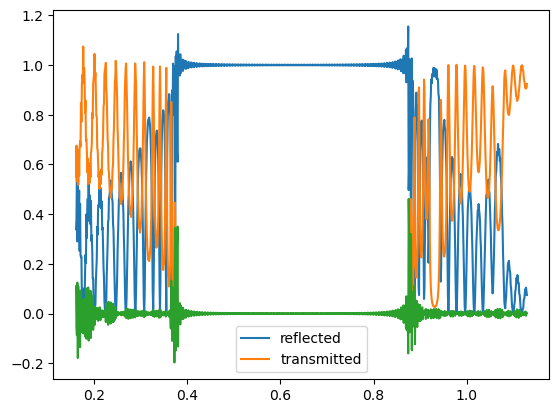

In [153]:
plt.plot(flux_freqs,-dbr_refl_flux/straight_refl_flux,label="reflected")
plt.plot(flux_freqs,dbr_tran_flux/straight_refl_flux, label="transmitted")
plt.plot(flux_freqs,1-(-dbr_refl_flux/straight_refl_flux)-(dbr_tran_flux/straight_refl_flux))
plt.legend()

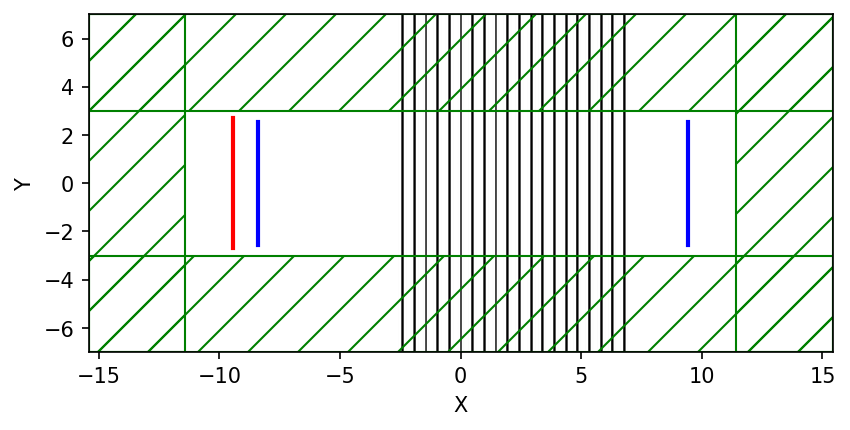

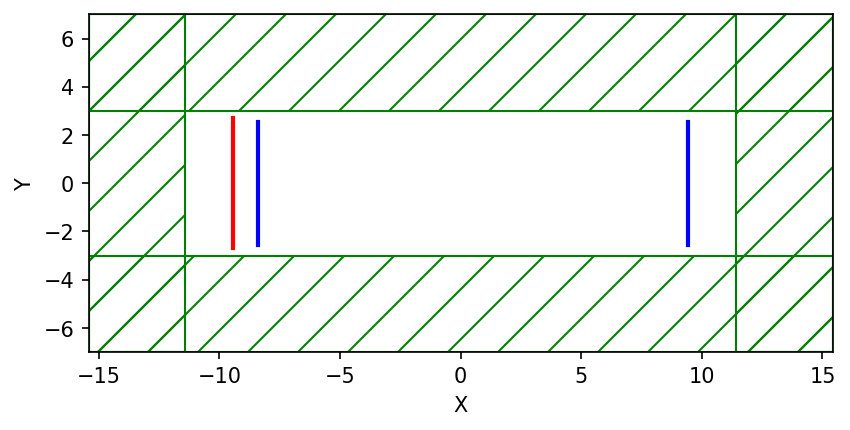

In [144]:
dbr = DBR(config_file="dbr_main.json")
dbr.view_sim_region()
dbr = DBR(config_file="dbr_reference.json")
dbr.view_sim_region()

2025-06-02 10:12:51,272 - INFO - Simulation parameters have been run before and ez field has been loaded!


Simulation Progress: 100%|██████████| 1000/1000 [00:11<00:00, 90.39it/s]


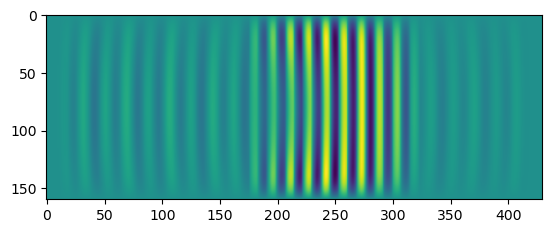

In [99]:
dbr = DBR(config_file="dbr_main.json")
dbr.run_simulation(save_ez=True)

dbr.plot_field_result()
flux_freqs = mp.get_flux_freqs(dbr.fluxes[0])